In [8]:
from FUNCTIONS import *
%matplotlib inline

import sklearn.discriminant_analysis
random.seed(42)

Total Events: 200000
Total Labels: 200000

Shape:  (200000, 1600)

Train:  (139400, 1600) (139400,)
Val:  (30600, 1600) (30600,)
Test:  (30000, 1600) (30000,)
 


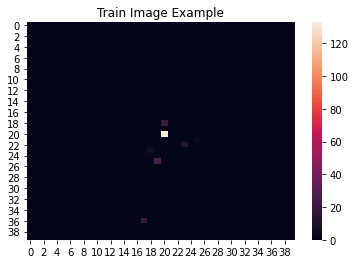

In [14]:
# MAIN
data_s = np.array(pd.read_csv('data_s_180k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data_b_180k').iloc[:, 1:])

# Slice & Save
events_no = int(100000)
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)




In [15]:
SVM = SVC(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time


# SVM
c_parameter = [5]
gamma = ['scale']
# Hyperparameters
SVM_parameters = {'C': c_parameter, 'gamma': gamma}
# Scoring object using accuracy
scorer = make_scorer(accuracy_score)
clfs_param =[(SVM, SVM_parameters)]

In [ ]:
# Create list to store models
models = []
unopt_accuracy = []
accuracies = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = -3)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
    print("Optimised-accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
    print("Optimised-accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_accuracy.append(accuracy_score(val_labels, predictions))
    accuracies.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised accuracy (validation): {}'.format(unopt_accuracy))
print('Best unoptimised accuracy (validation): {}\n'.format(max(unopt_accuracy)))
print('All optimised accuracy (validation): {}'.format(accuracies))
print('Best optimised accuracy (validation): {}'.format(max(accuracies)))


SVC

Time to tune: 41107s


In [ ]:
cmxx = sklearn.metrics.confusion_matrix(test_labels, models[0].predict(test_examples))
sns.heatmap(cmxx)
cmxx

In [ ]:
print(models)
cmx_sklearn(models, test_examples, test_labels, dim=4)